In [63]:
import cv2
from matplotlib import pyplot as plt

In [64]:
image_file = "data/lotto_tix.jpg"
img = cv2.imread(image_file)

In [65]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    
    if len(im_data.shape) == 2:  # Grayscale image
        height, width = im_data.shape
        depth = 1
    else:  # Color image
        height, width, depth = im_data.shape

    figsize = width / float(dpi), height / float(dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    ax.axis('off')

    if depth == 1:
        ax.imshow(im_data, cmap='gray')
    else:
        ax.imshow(im_data)

    plt.show()

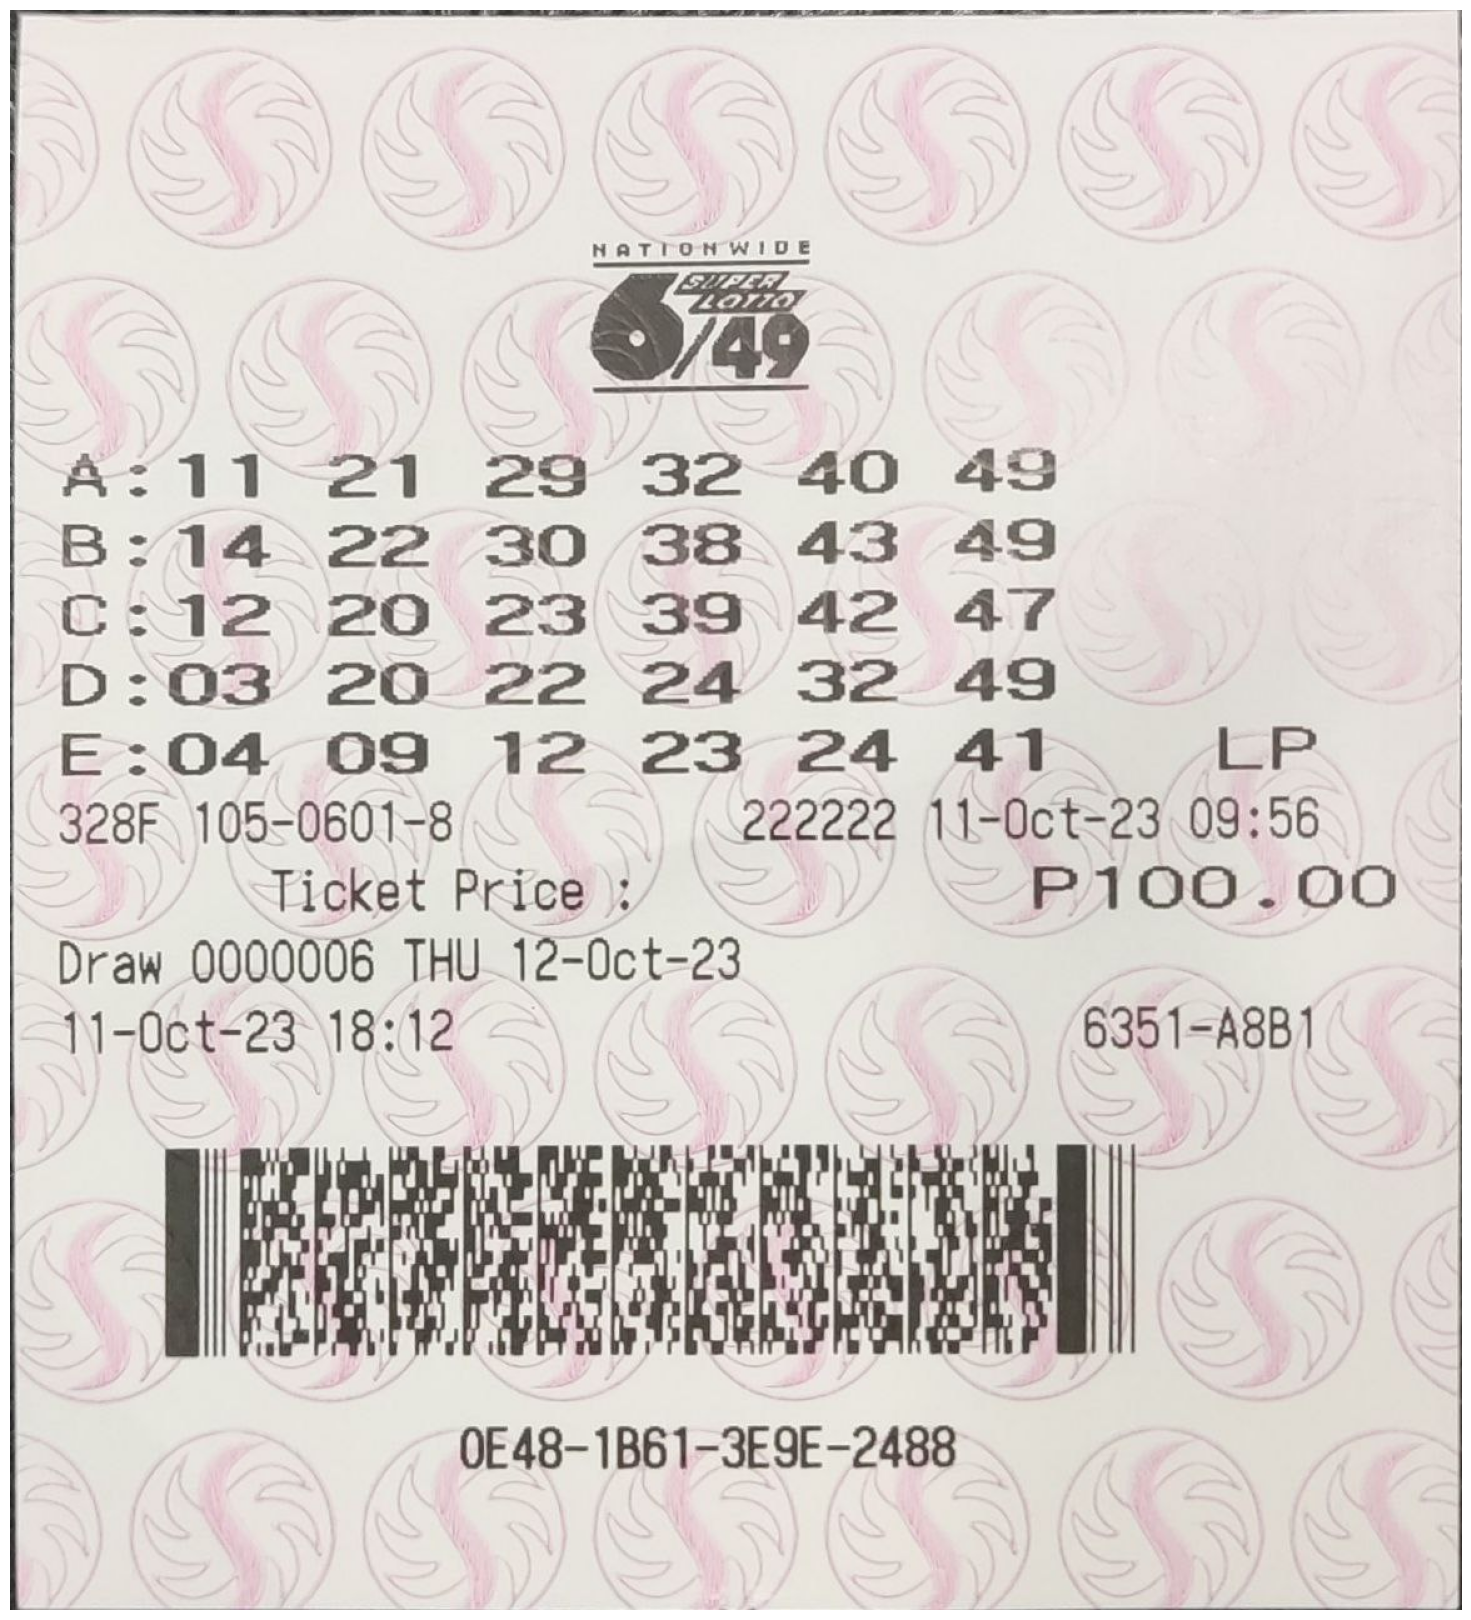

In [66]:
display(image_file)

# Invert Images

In [67]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite('temp/inverted.jpg', inverted_image)

True

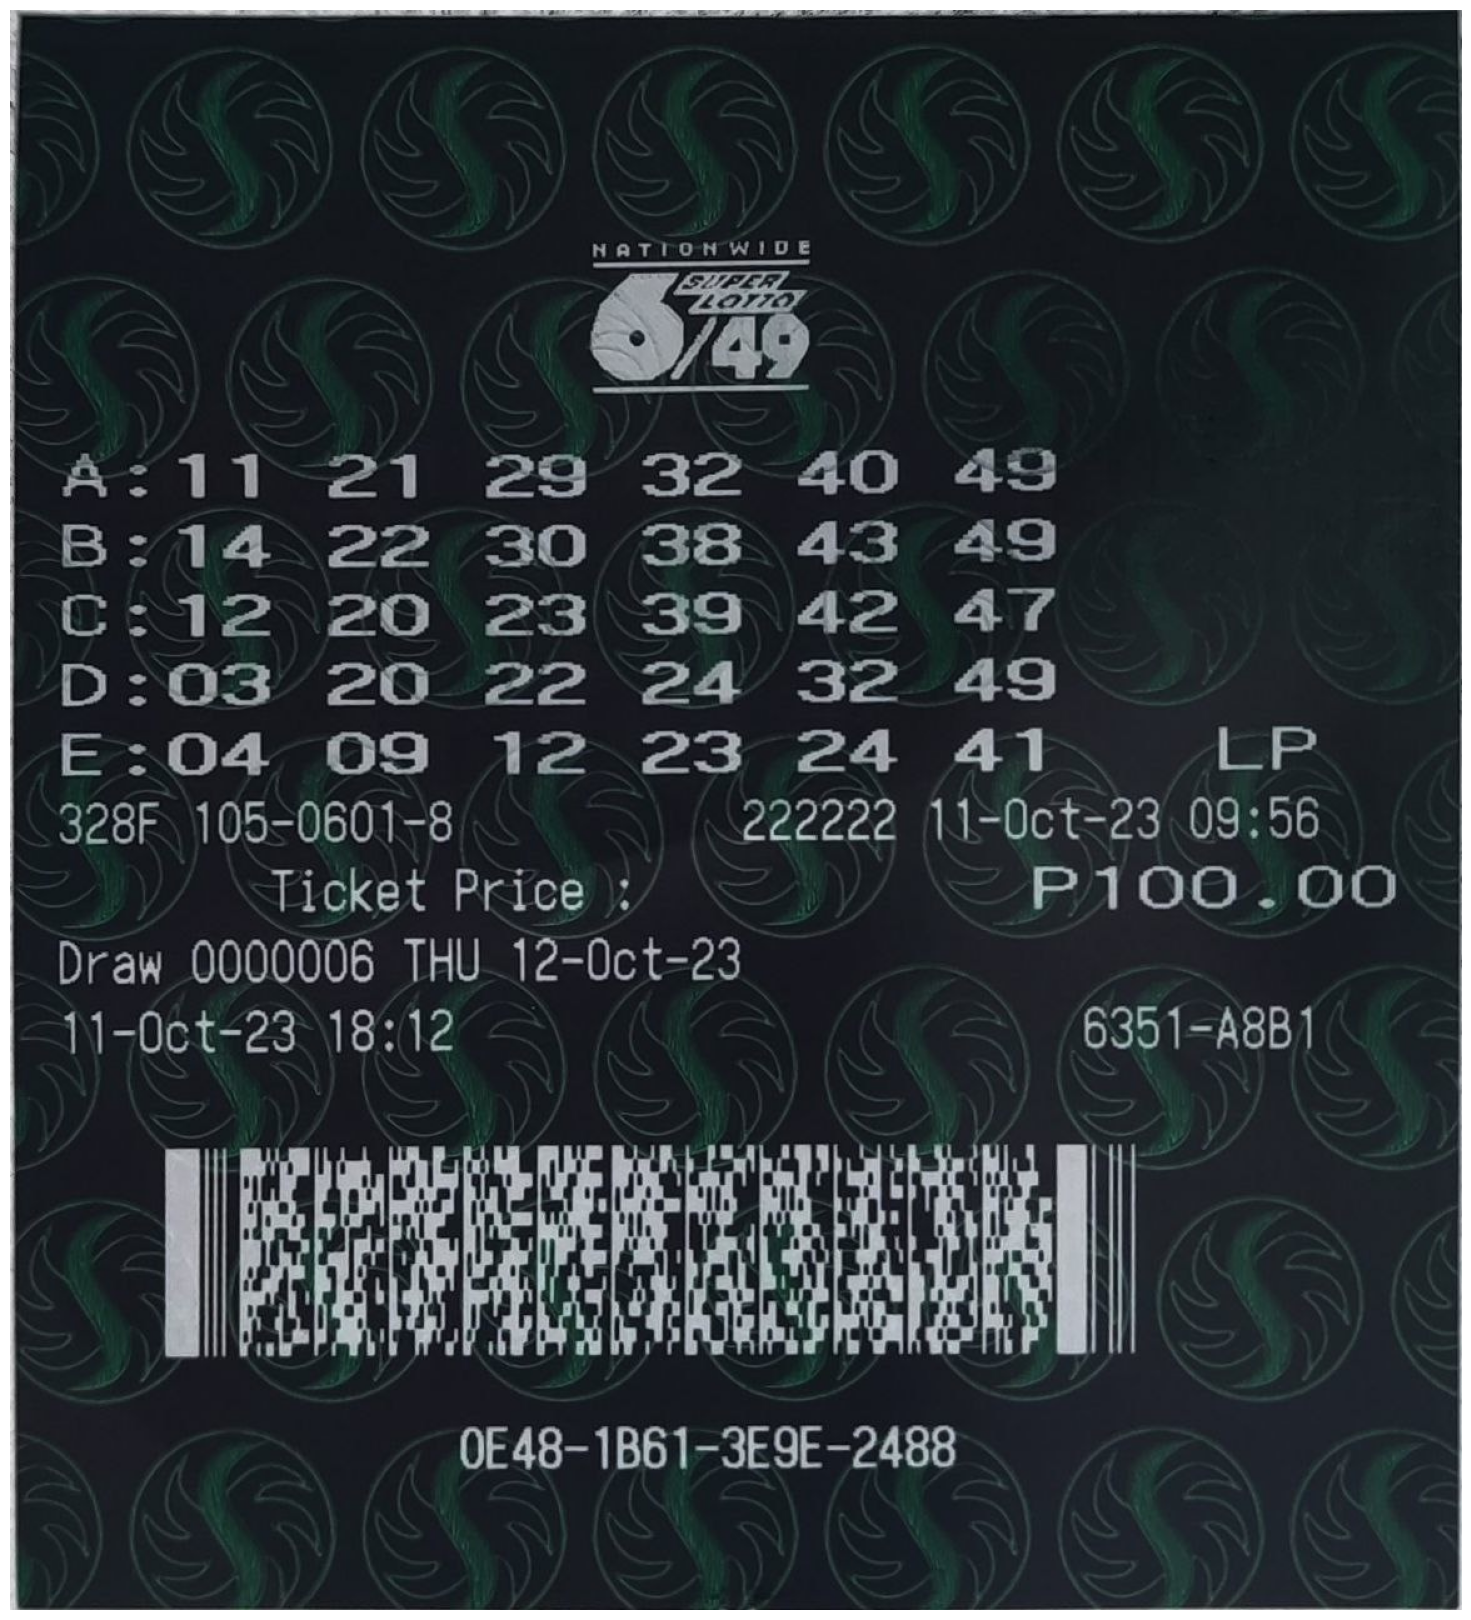

In [68]:
display('temp/inverted.jpg')

# Rescaling

 # Binarization

In [69]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [70]:
gray_image = grayscale(img)
cv2.imwrite('temp/gray.jpg', gray_image)
display('temp/gray.jpg')

ValueError: not enough values to unpack (expected 3, got 2)

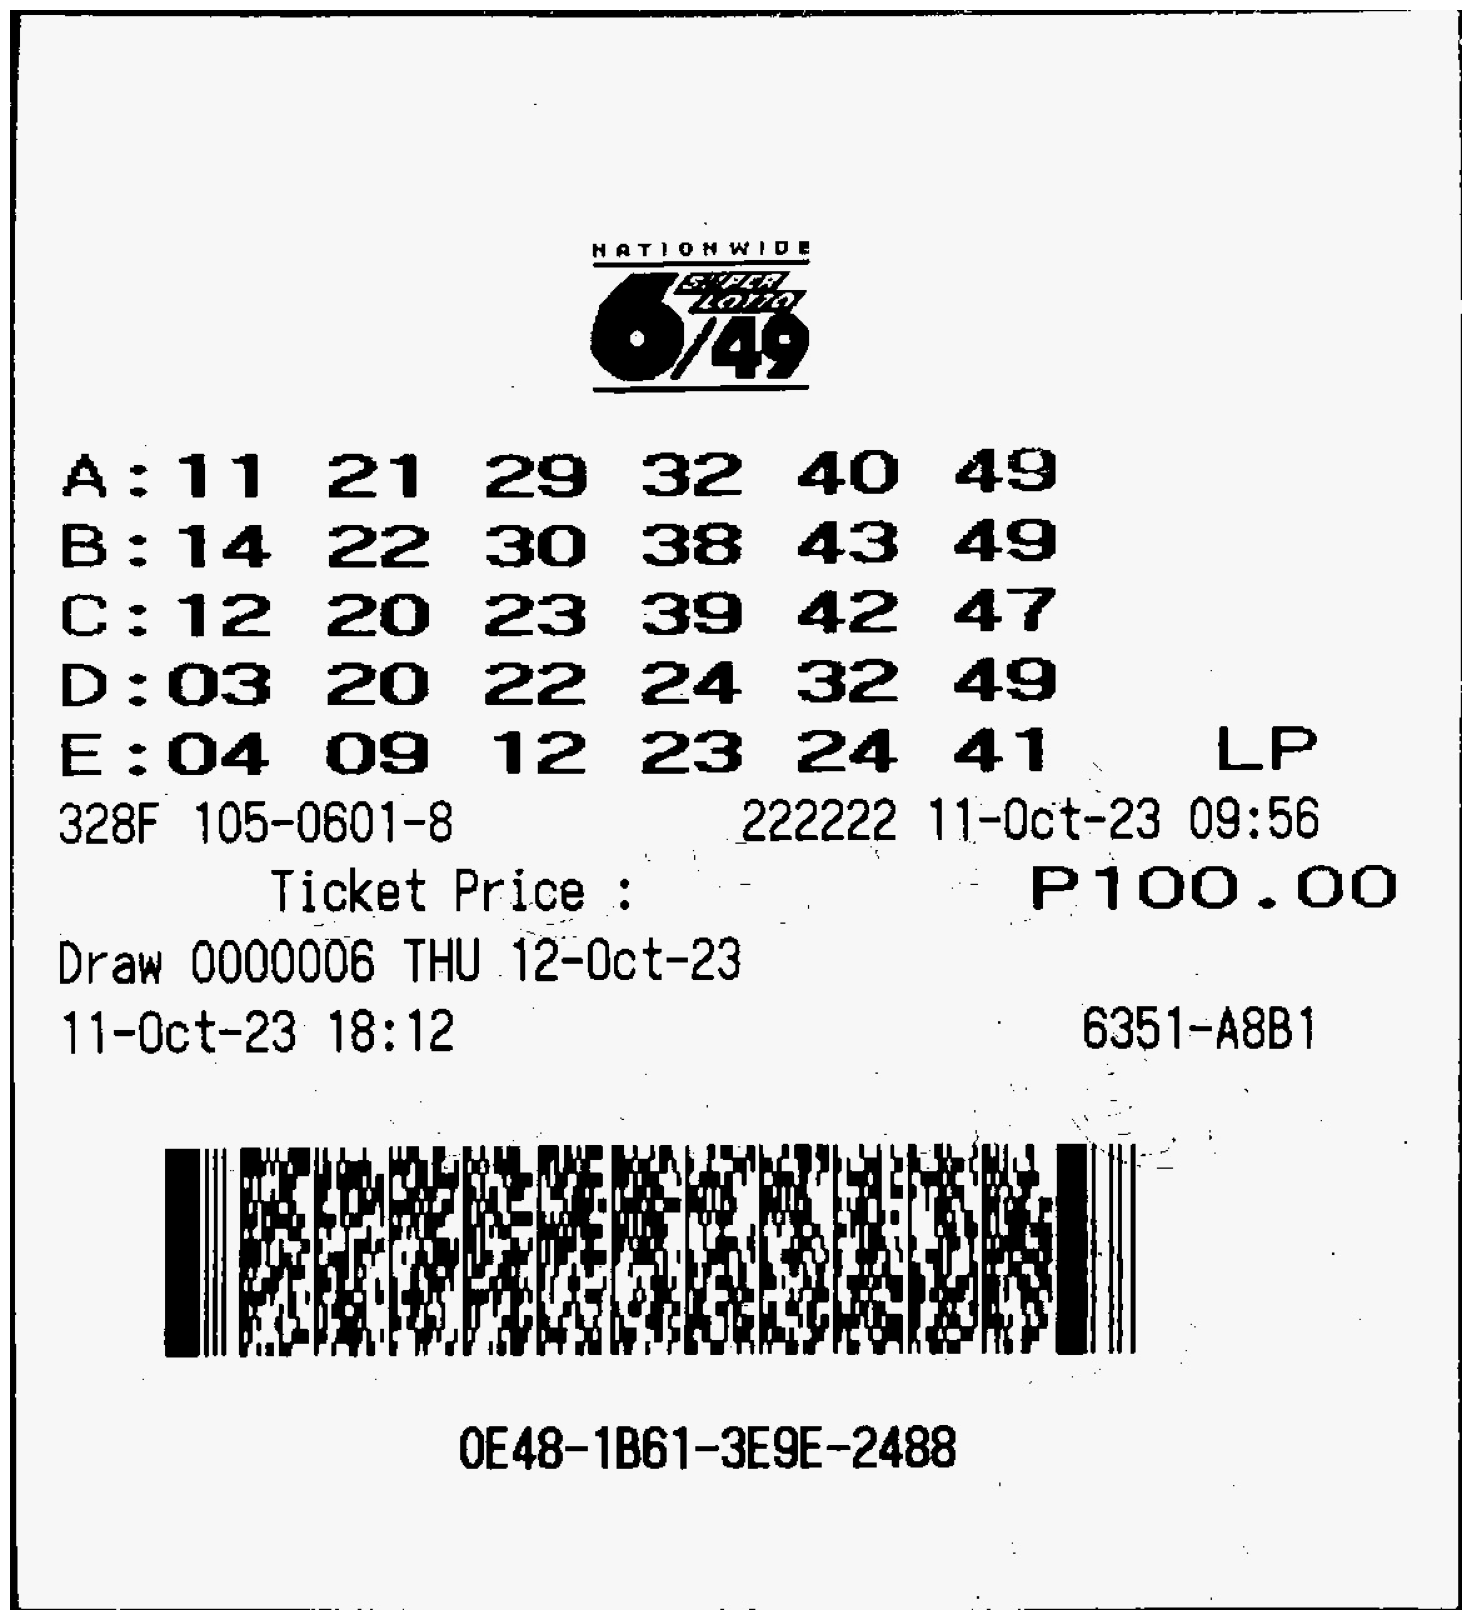

In [42]:
thresh, im_bw = cv2.threshold(gray_image, 180, 230, cv2.THRESH_BINARY)
cv2.imwrite('temp/bw_image.jpg', im_bw)
display('temp/bw_image.jpg')

# Noise Removal


In [71]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1,1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernal = np.ones((1,1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [72]:
no_noise = noise_removal(im_bw)
cv2.imwrite('temp/no_noise.jpg', no_noise)

True

In [73]:
display('temp/no_noise.jpg')

ValueError: not enough values to unpack (expected 3, got 2)

 # Dialation and Erosion


In [62]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2), np.unit8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)

In [61]:
display('temp/eroded_image.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'temp/eroded_image.jpg'